# Fase 1: Analisi Esplorativa

Questo notebook esegue l'analisi esplorativa dei due dataset:
- **Craigslist**: Dati di veicoli usati da Craigslist
- **US Used Cars**: Dati di veicoli usati dal dataset US Used Cars

## Obiettivi
1. Caricare e ispezionare i dati
2. Analizzare valori nulli
3. Analizzare valori unici
4. Generare statistiche riassuntive
5. Confrontare le due sorgenti dati

## 1. Import Librerie

In [1]:
import sys
import os

# Aggiungi il percorso della cartella src al PYTHONPATH
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
sys.path.append(os.path.abspath('..'))

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Imposta stile grafici
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Import modulo personalizzato
from src.data_analysis import DataAnalyzer, compare_sources

print("✓ Librerie importate con successo!")

✓ Librerie importate con successo!


## 2. Caricamento Dataset

In [3]:
# Percorsi dei dataset
craigslist_path = '../data/raw/craigslist/vehicles.csv'
usedcars_path = '../data/raw/usedcars/used_cars_data.csv'

# Carica i dataset
print("Caricamento dataset Craigslist...")
df_craigslist = pd.read_csv(craigslist_path, low_memory=False)
print(f"✓ Craigslist caricato: {len(df_craigslist):,} righe, {len(df_craigslist.columns)} colonne")

print("\nCaricamento dataset US Used Cars...")
df_usedcars = pd.read_csv(usedcars_path, low_memory=False)
print(f"✓ US Used Cars caricato: {len(df_usedcars):,} righe, {len(df_usedcars.columns)} colonne")

Caricamento dataset Craigslist...
✓ Craigslist caricato: 426,880 righe, 26 colonne

Caricamento dataset US Used Cars...
✓ US Used Cars caricato: 3,000,040 righe, 66 colonne


## 3. Ispezione Iniziale dei Dati

In [4]:
print("=" * 80)
print("CRAIGSLIST DATASET")
print("=" * 80)
print("\nPrime 5 righe:")
display(df_craigslist.head())

print("\n" + "=" * 80)
print("US USED CARS DATASET")
print("=" * 80)
print("\nPrime 5 righe:")
display(df_usedcars.head())

CRAIGSLIST DATASET

Prime 5 righe:


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN



US USED CARS DATASET

Prime 5 righe:


,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,...,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,...,A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,...,M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,...,A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


In [5]:
print("CRAIGSLIST - Info Dataset:")
print(df_craigslist.info())

print("\n" + "=" * 80)
print("\nUS USED CARS - Info Dataset:")
print(df_usedcars.info())

CRAIGSLIST - Info Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 

## 4. Analisi con DataAnalyzer - Craigslist

In [6]:
# Crea DataAnalyzer per Craigslist
analyzer_craigslist = DataAnalyzer(df_craigslist, 'Craigslist')
print("✓ DataAnalyzer per Craigslist creato")

✓ DataAnalyzer per Craigslist creato


In [7]:
# Statistiche riassuntive
summary_craigslist = analyzer_craigslist.get_summary_statistics()
print("STATISTICHE RIASSUNTIVE - CRAIGSLIST")
print("=" * 80)
for key, value in summary_craigslist.items():
    print(f"{key}: {value}")

STATISTICHE RIASSUNTIVE - CRAIGSLIST
source_name: Craigslist
total_rows: 426880
total_columns: 26
total_cells: 11098880
total_null_cells: 1655336
null_percentage: 14.914441817552762
memory_usage_mb: 4255.723106384277
duplicate_rows: 0


In [8]:
# Analisi valori nulli
null_stats_craigslist = analyzer_craigslist.analyze_null_values()
print("ANALISI VALORI NULLI - CRAIGSLIST (Top 15)")
print("=" * 80)
display(null_stats_craigslist.head(15))

ANALISI VALORI NULLI - CRAIGSLIST (Top 15)


,attribute,null_count,null_percentage,non_null_count
21,county,426880,100.000000,0
16,size,306361,71.767476,120519
9,cylinders,177678,41.622470,249202
8,condition,174104,40.785232,252776
14,VIN,161042,37.725356,265838
15,drive,130567,30.586347,296313
18,paint_color,130203,30.501078,296677
17,type,92858,21.752717,334022
6,manufacturer,17646,4.133714,409234
12,title_status,8242,1.930753,418638


In [9]:
# Analisi valori unici
unique_stats_craigslist = analyzer_craigslist.analyze_unique_values()
print("ANALISI VALORI UNICI - CRAIGSLIST (Top 15)")
print("=" * 80)
display(unique_stats_craigslist.head(15))

ANALISI VALORI UNICI - CRAIGSLIST (Top 15)


,attribute,unique_count,unique_percentage,total_count
0,id,426880,100.000000,426880
1,url,426880,100.000000,426880
25,posting_date,381536,89.377811,426880
20,description,360911,84.546243,426880
19,image_url,241899,56.666745,426880
14,VIN,118264,27.704273,426880
11,odometer,104870,24.566623,426880
24,long,53772,12.596514,426880
23,lat,53181,12.458068,426880
7,model,29667,6.949728,426880


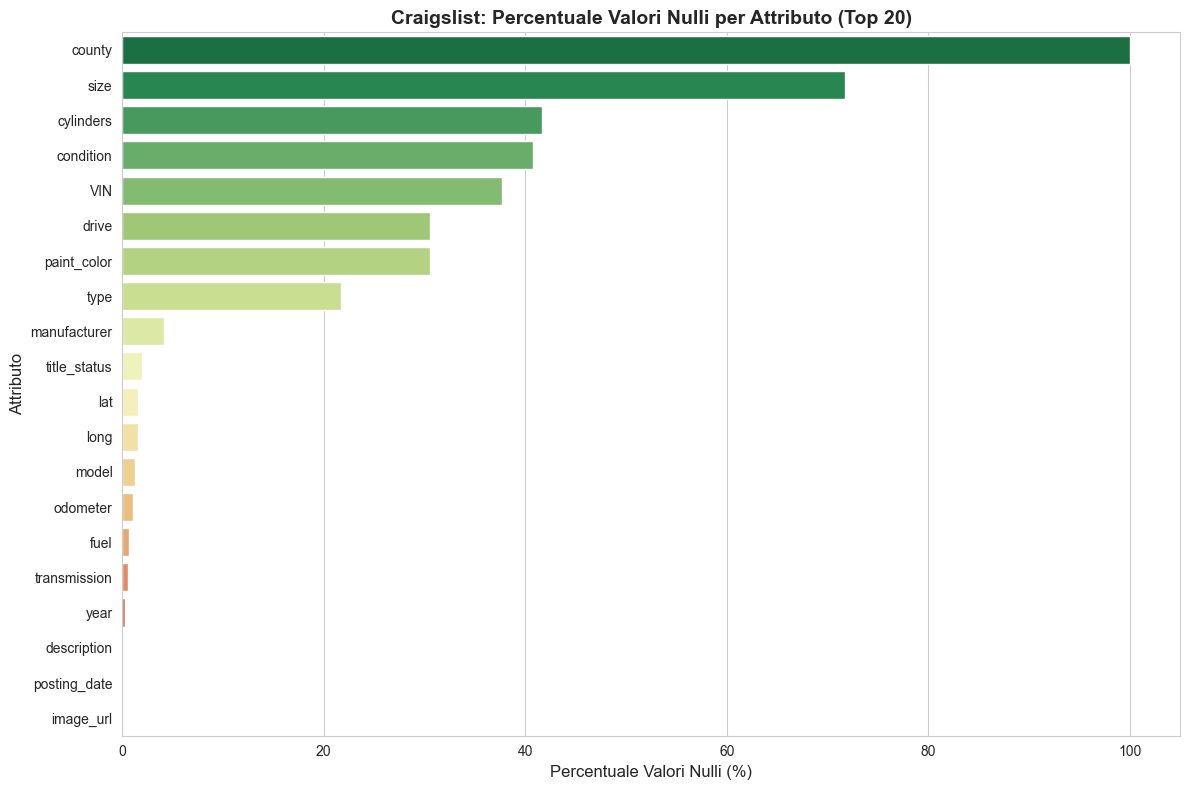

In [10]:
# Visualizzazione valori nulli
analyzer_craigslist.plot_null_values(top_n=20, save_path='../results/visualizations/craigslist_null_values.png')

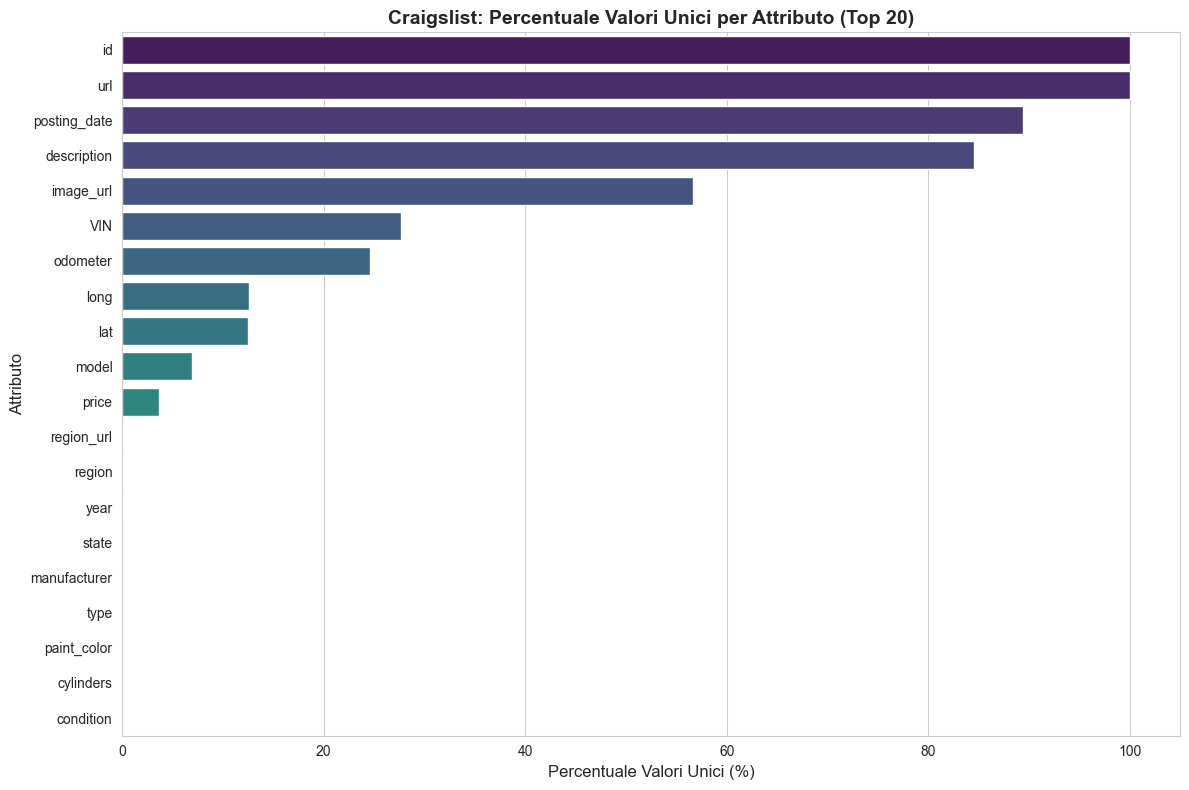

In [11]:
# Visualizzazione valori unici
analyzer_craigslist.plot_unique_values(top_n=20, save_path='../results/visualizations/craigslist_unique_values.png')

## 5. Analisi con DataAnalyzer - US Used Cars

In [12]:
# Crea DataAnalyzer per US Used Cars
analyzer_usedcars = DataAnalyzer(df_usedcars, 'US Used Cars')
print("✓ DataAnalyzer per US Used Cars creato")

✓ DataAnalyzer per US Used Cars creato


In [13]:
# Statistiche riassuntive
summary_usedcars = analyzer_usedcars.get_summary_statistics()
print("STATISTICHE RIASSUNTIVE - US USED CARS")
print("=" * 80)
for key, value in summary_usedcars.items():
    print(f"{key}: {value}")

STATISTICHE RIASSUNTIVE - US USED CARS
source_name: US Used Cars
total_rows: 3000040
total_columns: 66
total_cells: 198002640
total_null_cells: 42208456
null_percentage: 21.317117791964794
memory_usage_mb: 15276.325262069702
duplicate_rows: 40


In [14]:
# Analisi valori nulli
null_stats_usedcars = analyzer_usedcars.analyze_null_values()
print("ANALISI VALORI NULLI - US USED CARS (Top 15)")
print("=" * 80)
display(null_stats_usedcars.head(15))

ANALISI VALORI NULLI - US USED CARS (Top 15)


,attribute,null_count,null_percentage,non_null_count
30,is_certified,3000040,100.000000,0
9,combine_fuel_economy,3000040,100.000000,0
60,vehicle_damage_category,3000040,100.000000,0
2,bed,2980472,99.347742,19568
6,cabin,2936507,97.882262,63533
33,is_oemcpo,2864678,95.487993,135362
31,is_cpo,2817142,93.903481,182898
4,bed_length,2570942,85.696924,429098
3,bed_height,2570942,85.696924,429098
46,owner_count,1517013,50.566426,1483027


In [15]:
# Analisi valori unici
unique_stats_usedcars = analyzer_usedcars.analyze_unique_values()
print("ANALISI VALORI UNICI - US USED CARS (Top 15)")
print("=" * 80)
display(unique_stats_usedcars.head(15))

ANALISI VALORI UNICI - US USED CARS (Top 15)


,attribute,unique_count,unique_percentage,total_count
0,vin,3000000,99.998667,3000040
38,listing_id,3000000,99.998667,3000040
12,description,2519325,83.976380,3000040
40,main_picture_url,2415855,80.527426,3000040
41,major_options,279972,9.332276,3000040
44,mileage,197577,6.585812,3000040
48,price,88861,2.961994,3000040
28,interior_color,45725,1.524146,3000040
58,trimId,41329,1.377615,3000040
16,exterior_color,28664,0.955454,3000040


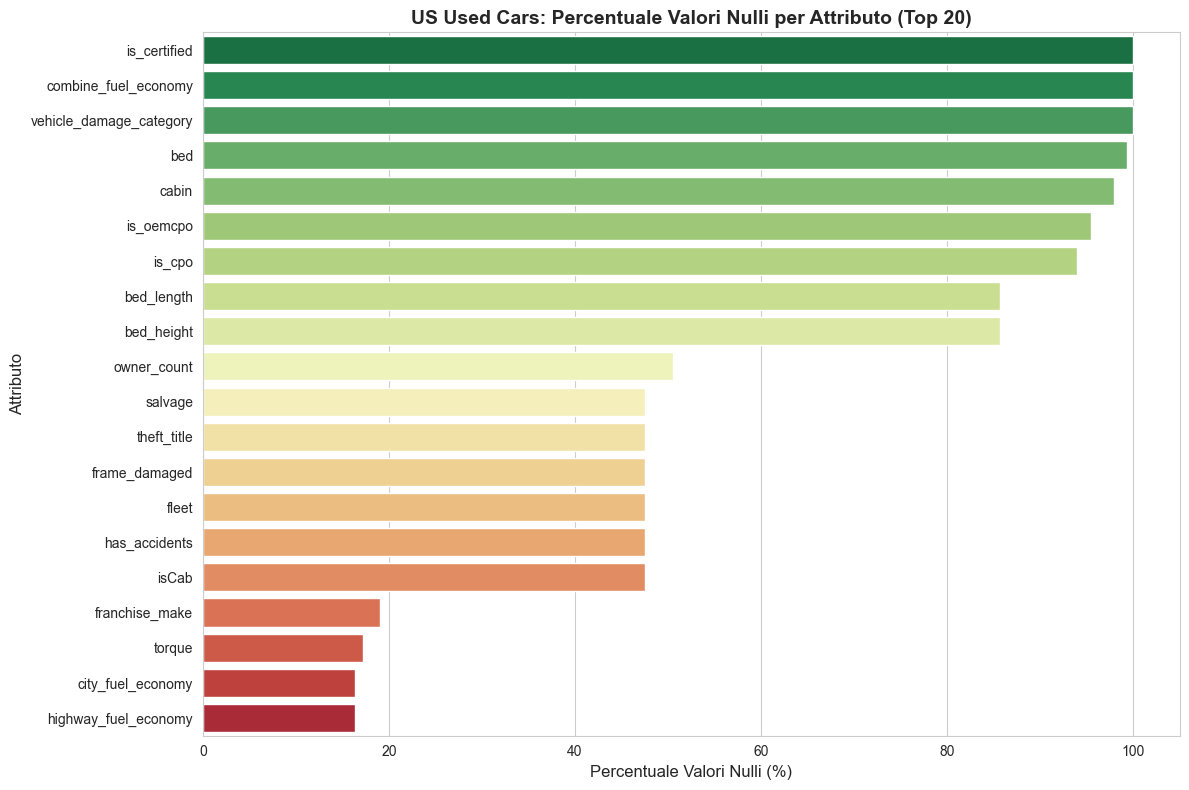

In [16]:
# Visualizzazione valori nulli
analyzer_usedcars.plot_null_values(top_n=20, save_path='../results/visualizations/usedcars_null_values.png')

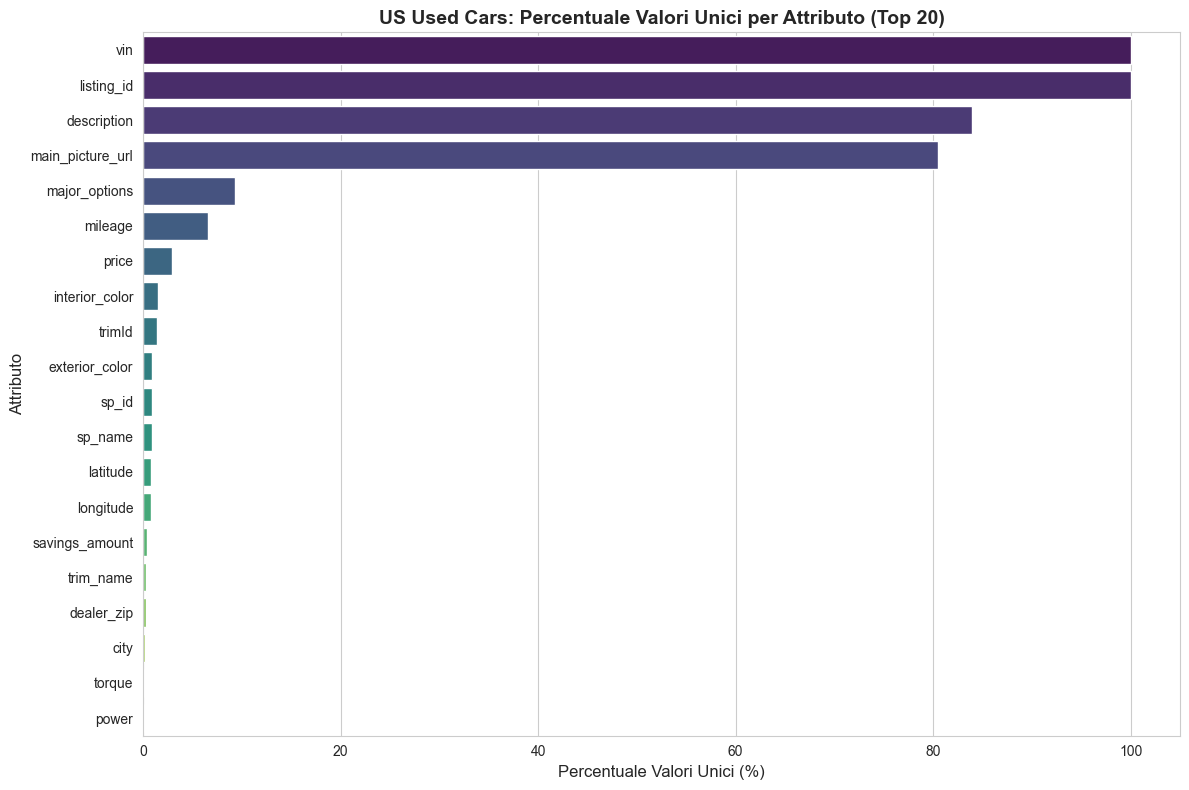

In [17]:
# Visualizzazione valori unici
analyzer_usedcars.plot_unique_values(top_n=20, save_path='../results/visualizations/usedcars_unique_values.png')

## 6. Confronto tra le Due Sorgenti

In [18]:
# Confronto tra le due sorgenti
comparison = compare_sources(analyzer_craigslist, analyzer_usedcars)
print("CONFRONTO TRA LE DUE SORGENTI")
print("=" * 80)
display(comparison)

CONFRONTO TRA LE DUE SORGENTI


,Metrica,Craigslist,US Used Cars
0,Righe,"426,880","3,000,040"
1,Colonne,26,66
2,Celle Totali,"11,098,880","198,002,640"
3,Celle Nulle,"1,655,336","42,208,456"
4,Percentuale Nulli,14.91%,21.32%
5,Memoria (MB),4255.72,15276.45
6,Righe Duplicate,0,40


In [19]:
# Confronto colonne
print("COLONNE CRAIGSLIST:")
print("-" * 80)
print(f"Totale colonne: {len(df_craigslist.columns)}")
print(sorted(df_craigslist.columns.tolist()))

print("\n" + "=" * 80)
print("COLONNE US USED CARS:")
print("-" * 80)
print(f"Totale colonne: {len(df_usedcars.columns)}")
print(sorted(df_usedcars.columns.tolist()))

COLONNE CRAIGSLIST:
--------------------------------------------------------------------------------
Totale colonne: 26
['VIN', 'condition', 'county', 'cylinders', 'description', 'drive', 'fuel', 'id', 'image_url', 'lat', 'long', 'manufacturer', 'model', 'odometer', 'paint_color', 'posting_date', 'price', 'region', 'region_url', 'size', 'state', 'title_status', 'transmission', 'type', 'url', 'year']

COLONNE US USED CARS:
--------------------------------------------------------------------------------
Totale colonne: 66
['back_legroom', 'bed', 'bed_height', 'bed_length', 'body_type', 'cabin', 'city', 'city_fuel_economy', 'combine_fuel_economy', 'daysonmarket', 'dealer_zip', 'description', 'engine_cylinders', 'engine_displacement', 'engine_type', 'exterior_color', 'fleet', 'frame_damaged', 'franchise_dealer', 'franchise_make', 'front_legroom', 'fuel_tank_volume', 'fuel_type', 'has_accidents', 'height', 'highway_fuel_economy', 'horsepower', 'interior_color', 'isCab', 'is_certified', 'is_

## 8. Salvataggio Report (Opzionale)

In [20]:
# Genera e salva report completi per entrambi i dataset
report_craigslist = analyzer_craigslist.generate_full_report(
    output_path='../results/craigslist_analysis_report.txt'
)
print("✓ Report Craigslist salvato in: results/craigslist_analysis_report.txt")

report_usedcars = analyzer_usedcars.generate_full_report(
    output_path='../results/usedcars_analysis_report.txt'
)
print("✓ Report US Used Cars salvato in: results/usedcars_analysis_report.txt")

✓ Report Craigslist salvato in: results/craigslist_analysis_report.txt
✓ Report US Used Cars salvato in: results/usedcars_analysis_report.txt
